Analyze the proteome for the E. coli core model
- Map measured protein abundaces to model genes/enzymes

In [1]:
import pandas as pd
import cobra
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load proteome data
## Protein abundances

In [2]:
# load proteome data (Schmidt et al. 2016)
proteome_df = pd.read_excel('../Data/proteome_data_extract_schmidt2016.xlsx',
                            sheet_name='ProteinMasses',
                            engine='openpyxl',
                            index_col=0)

proteome_df


,Glucose,LB,Glycerol + AA,Acetate,Fumarate,Glucosamine,Glycerol,Pyruvate,Chemostat µ=0.5,Chemostat µ=0.35,...,Stationary phase 1 day,Stationary phase 3 days,Osmotic-stress glucose,42°C glucose,pH6 glucose,Xylose,Mannose,Galactose,Succinate,Fructose
Bnumber,,,,,,,,,,,,,,,,,,,,,
b3988,0.715349,1.844515,1.159331,0.561253,0.629318,0.853642,0.732347,0.702820,1.230766,1.004203,...,4.466397e-01,4.910739e-01,0.578723,1.026062e+00,0.859739,0.934963,8.757239e-01,5.813814e-01,7.116349e-01,1.162894
b3987,0.989135,2.221614,1.299346,0.665163,0.799515,0.999545,0.936990,0.928398,1.310899,1.096833,...,5.944920e-01,5.565920e-01,0.813304,1.230390e+00,1.007687,1.109002,1.035491e+00,7.049528e-01,9.635688e-01,1.317061
b0118,1.178283,2.575086,2.722244,3.543745,3.023680,2.133445,1.674174,2.543362,2.440666,3.143073,...,1.447816e-01,1.173512e-01,0.436610,7.511055e-01,0.721180,1.038963,2.562241e+00,1.997324e+00,3.032313e+00,1.362394
b2557,0.576304,0.192554,0.548796,0.337313,0.486028,0.459618,0.485143,0.635390,0.536179,0.405983,...,1.449196e-01,1.724214e-01,0.309267,4.423852e-01,0.400793,0.403734,4.139472e-01,3.684797e-01,4.489504e-01,0.564445
b3212,0.774653,0.163742,0.176652,0.369212,0.347026,0.535762,0.597161,0.458132,0.629009,0.530940,...,6.220451e-02,4.961751e-02,0.225865,8.072853e-01,0.737951,0.676351,5.631967e-01,3.788294e-01,4.207655e-01,1.045406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.000167,0.001322,NaN,0.000097,0.000504,0.000339,0.000170,0.000183,0.000151,0.000068,...,1.524261e-04,0.000000e+00,0.000010,2.769145e-04,0.000304,NaN,NaN,6.570810e-05,2.050574e-04,NaN
NaN,0.000084,0.000012,0.000002,0.000249,0.000235,0.000125,0.000252,0.000419,0.000644,0.000241,...,6.333976e-07,6.237618e-07,0.000004,9.527910e-06,0.000001,0.000001,1.052190e-06,8.777261e-07,1.026332e-06,0.000001
NaN,0.002472,0.000022,0.000066,0.000770,0.000334,0.000590,0.000709,0.000805,0.000652,0.000320,...,3.374665e-07,1.943465e-04,0.000770,1.372202e-03,0.001054,0.001213,9.174705e-04,3.517107e-04,2.757719e-04,0.001285


In [3]:
# normalize protein abundances to total protein abundance
sum_proteines = proteome_df.sum(axis=0)
proteome_norm_df = proteome_df / sum_proteines
proteome_norm_df

,Glucose,LB,Glycerol + AA,Acetate,Fumarate,Glucosamine,Glycerol,Pyruvate,Chemostat µ=0.5,Chemostat µ=0.35,...,Stationary phase 1 day,Stationary phase 3 days,Osmotic-stress glucose,42°C glucose,pH6 glucose,Xylose,Mannose,Galactose,Succinate,Fructose
Bnumber,,,,,,,,,,,,,,,,,,,,,
b3988,2.941474e-03,5.026393e-03,3.550227e-03,2.858254e-03,2.896226e-03,3.786753e-03,3.247723e-03,3.286201e-03,5.342251e-03,4.889101e-03,...,3.199374e-03,3.536290e-03,2.428557e-03,4.022638e-03,3.431053e-03,3.932964e-03,3.892800e-03,3.075565e-03,3.226823e-03,4.598847e-03
b3987,4.067266e-03,6.054005e-03,3.978997e-03,3.387428e-03,3.679503e-03,4.433976e-03,4.155249e-03,4.340946e-03,5.690078e-03,5.340084e-03,...,4.258471e-03,4.008095e-03,3.412954e-03,4.823697e-03,4.021487e-03,4.665070e-03,4.603003e-03,3.729270e-03,4.369188e-03,5.208525e-03
b0118,4.845034e-03,7.017233e-03,8.336348e-03,1.804699e-02,1.391549e-02,9.463954e-03,7.424421e-03,1.189210e-02,1.059393e-02,1.530249e-02,...,1.037101e-03,8.450620e-04,1.832193e-03,2.944681e-03,2.878090e-03,4.370448e-03,1.138977e-02,1.056604e-02,1.374966e-02,5.387801e-03
b2557,2.369729e-03,5.247197e-04,1.680582e-03,1.717809e-03,2.236781e-03,2.038865e-03,2.151453e-03,2.970919e-03,2.327332e-03,1.976587e-03,...,1.038090e-03,1.241630e-03,1.297808e-03,1.734354e-03,1.599490e-03,1.698326e-03,1.840094e-03,1.949294e-03,2.035712e-03,2.232186e-03
b3212,3.185331e-03,4.462054e-04,5.409631e-04,1.880260e-03,1.597071e-03,2.376639e-03,2.648216e-03,2.142107e-03,2.730272e-03,2.584953e-03,...,4.455840e-04,3.573025e-04,9.478229e-04,3.164931e-03,2.945022e-03,2.845100e-03,2.503543e-03,2.004045e-03,1.907911e-03,4.134224e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,6.851077e-07,3.602707e-06,NaN,4.952390e-07,2.317645e-06,1.502131e-06,7.546521e-07,8.554820e-07,6.538958e-07,3.325533e-07,...,1.091860e-06,0.000000e+00,4.164754e-08,1.085633e-06,1.214564e-06,NaN,NaN,3.476024e-07,9.298084e-07,NaN
NaN,3.436903e-07,3.297128e-08,4.692171e-09,1.266535e-06,1.081327e-06,5.536750e-07,1.118401e-06,1.958754e-06,2.794743e-06,1.172058e-06,...,4.537160e-09,4.491794e-09,1.575463e-08,3.735381e-08,4.633229e-09,4.624998e-09,4.677236e-09,4.643258e-09,4.653780e-09,4.681092e-09
NaN,1.016463e-05,5.960815e-08,2.028619e-07,3.922468e-06,1.535391e-06,2.616758e-06,3.142143e-06,3.764873e-06,2.828644e-06,1.556013e-06,...,2.417344e-09,1.399516e-06,3.232982e-06,5.379667e-06,4.205954e-06,5.102658e-06,4.078374e-06,1.860585e-06,1.250455e-06,5.079908e-06


## Growth rates

In [4]:
# load growth rate data [1/h] (Schmidt et al. 2016)
growth_rate_df = pd.read_excel('../Data/proteome_data_extract_schmidt2016.xlsx',
                                 sheet_name='GrowthRates',
                                 engine='openpyxl',
                                 index_col=0
                                 )
growth_rate_df

,Growth rates
Condition,
LB,1.90
Glycerol + AA,1.27
Acetate,0.30
Fumarate,0.42
Galactose,0.26
Glucose,0.58
Glucosamine,0.46
Glycerol,0.47
Pyruvate,0.40


## COG

In [5]:
# load conversion table from gene to COG
gene2cog_df = pd.read_excel('../Data/proteome_data_extract_schmidt2016.xlsx',
                          sheet_name='Gene2COG',
                          engine='openpyxl',
                          index_col=0)
gene2cog_df

,COG ID,COG Name
Bnumber,,
b3988,K,Transcription
b3987,K,Transcription
b0118,C,Energy production and conversion
b2557,F,Nucleotide transport and metabolism
b3212,E,Amino acid transport and metabolism
...,...,...
NaN,-,NaN
NaN,-,NaN
NaN,-,NaN


# Load model

In [6]:
model = cobra.io.load_json_model('../Models/e_coli_core.json')

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-06


# General proteome analysis
## RNA polymerase

<AxesSubplot:xlabel='Growth rates', ylabel='Proteinfraction'>

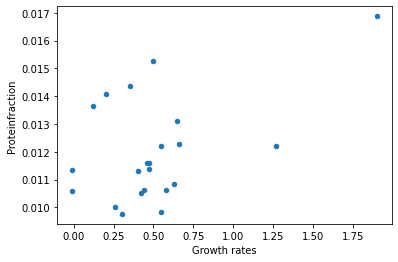

In [7]:
# analyze RNA polymerase abundances
# rnap_genes = ['b3988', 'b3987', 'b3295', 'b3067', 'b2741', 'b3202', 'b3649', 'b2573']
rnap_genes = ['b3295', 'b3987', 'b3988'], # rpoA, rpoB, rpoC -> RNA polymerase core enzyme 
# get abundaces of RNA polymerase genes (rnap_genes)
rnap_fractions_ds = proteome_norm_df.loc[rnap_genes].sum(axis=0)
rnap_fractions_ds.rename('Proteinfraction', inplace=True)

# merge sum of protein abundaces with growth rate data
rnap_abundances_df = pd.concat([rnap_fractions_ds, growth_rate_df], axis=1)
rnap_abundances_df

# print as scatter plot
rnap_abundances_df.plot.scatter(x='Growth rates', y='Proteinfraction')

# Analyze proteome of E. coli core model
## Protein abundance of model proteins

In [8]:
genes_in_dataset = []
for g in model.genes:
    if g.id in proteome_norm_df.index:
        genes_in_dataset.append(g.id)
    else:
        print(f'{g.id} {g.name} not in proteome data')

# extract protein abundances for genes in dataset
proteome_norm_model_df = proteome_norm_df.loc[genes_in_dataset]
proteome_norm_model_df

s0001  not in proteome data
b3115 tdcD not in proteome data
b0116 lpd not in proteome data
b3739 atpI not in proteome data
b0979 cbdB not in proteome data
b3603 lldP not in proteome data
b1773 ydjI not in proteome data
b2492 focB not in proteome data
b4152 frdC not in proteome data
b4151 frdD not in proteome data
b1621 malX not in proteome data
b1524 glsB not in proteome data
b0485 glsA not in proteome data
b0875 aqpZ not in proteome data
b2280 nuoJ not in proteome data
b2579 grcA not in proteome data
b3951 pflD not in proteome data
b3952 pflC not in proteome data
b3612 gpmM not in proteome data
b4395 ytjC not in proteome data
b2987 pitB not in proteome data
b3403 pck not in proteome data
b2458 eutD not in proteome data
b4301 sgcE not in proteome data


,Glucose,LB,Glycerol + AA,Acetate,Fumarate,Glucosamine,Glycerol,Pyruvate,Chemostat µ=0.5,Chemostat µ=0.35,...,Stationary phase 1 day,Stationary phase 3 days,Osmotic-stress glucose,42°C glucose,pH6 glucose,Xylose,Mannose,Galactose,Succinate,Fructose
Bnumber,,,,,,,,,,,,,,,,,,,,,
b1241,0.003181,0.002378,0.002752,0.003663,0.002941,0.005208,0.003668,0.002455,0.007168,0.005931,...,0.008040,0.007712,0.003491,0.005646,0.005738,0.005630,0.004238,0.005336,0.002931,0.012611
b0351,0.000058,0.000030,NaN,0.000022,0.000027,0.000033,0.000024,0.000021,0.000039,0.000051,...,0.000014,0.000011,0.000049,0.000041,0.000044,NaN,NaN,0.000017,0.000034,NaN
b1849,0.000688,0.000070,0.000278,0.000263,0.000409,0.000529,0.000444,0.000777,0.000433,0.000316,...,0.000338,0.000338,0.000495,0.000615,0.000463,0.000446,0.000446,0.000467,0.000396,0.000381
b2296,0.000904,0.001685,0.000870,0.000533,0.000792,0.000658,0.000824,0.002779,0.000625,0.000706,...,0.001196,0.001083,0.000880,0.000948,0.001086,0.001512,0.001176,0.001133,0.001115,0.001357
b1276,0.000397,0.000431,0.000390,0.001321,0.000994,0.001096,0.000581,0.000595,0.000690,0.001024,...,0.000623,0.000662,0.000407,0.000424,0.000427,0.000344,0.000912,0.001122,0.000867,0.000433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b0008,0.002553,0.002517,0.003291,0.002000,0.002605,0.002547,0.002926,0.003065,0.002528,0.001977,...,0.002751,0.003207,0.003328,0.004449,0.003079,0.003284,0.002368,0.002386,0.002547,0.002890
b2464,0.000352,0.000154,0.000202,0.000400,0.000348,0.000389,0.000358,0.000235,0.000248,0.000306,...,0.001226,0.001371,0.000501,0.000534,0.000893,0.000297,0.000343,0.000810,0.000297,0.000231
b2465,0.000375,0.000125,0.000185,0.000594,0.000509,0.000502,0.000496,0.000356,0.000466,0.000552,...,0.000998,0.001070,0.000496,0.000485,0.000784,0.000334,0.000523,0.000955,0.000469,0.000319


Text(0, 0.5, 'Model protein abundance')

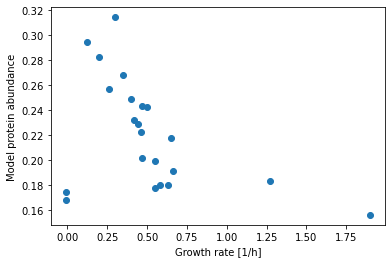

In [9]:
# sum protein abundances for each condition
proteome_norm_model_sum_ds = proteome_norm_model_df.sum(axis=0)
proteome_norm_model_sum_ds.rename('Protein abundance sum', inplace=True)

# merge sum of protein abundaces with growth rate data
proteome_norm_model_sum_df = pd.concat([proteome_norm_model_sum_ds, growth_rate_df], axis=1)

# plot sum of protein abundances against growth rate as scatter plot
fig, ax = plt.subplots()
ax.scatter(proteome_norm_model_sum_df['Growth rates'], proteome_norm_model_sum_df['Protein abundance sum'])
ax.set_xlabel('Growth rate [1/h]')
ax.set_ylabel('Model protein abundance')


# Translational sector (J)

Text(0, 0.5, 'Translational protein abundance')

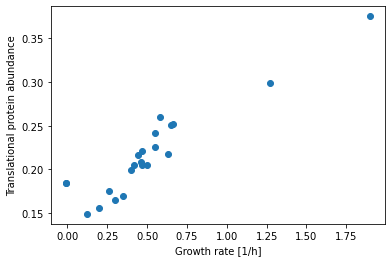

In [10]:
# sum protein abundances of proteins from COG J
# get Bnumbers associated with COG ID J from gene2cog_df
bnumbers_j = gene2cog_df.loc[gene2cog_df['COG ID'] == 'J'].index.to_list()

# sum protein abundances of translational protein sector
proteome_norm_sum_j = proteome_norm_df.loc[bnumbers_j].sum(axis=0)
proteome_norm_sum_j.rename('Protein abundance sum', inplace=True)

# merge with growth rates
proteome_norm_sum_j_df = pd.concat([proteome_norm_sum_j, growth_rate_df], axis=1)

# plot sum of protein abundances against growth rate as scatter plot
fig, ax = plt.subplots()
ax.scatter(proteome_norm_sum_j_df['Growth rates'], proteome_norm_sum_j_df['Protein abundance sum'])
ax.set_xlabel('Growth rate [1/h]')
ax.set_ylabel('Translational protein abundance')

## Merge translational and model protein sector 

                         Protein abundance sum  Growth rates
Stationary phase 1 day                0.353414         -0.01
Stationary phase 3 days               0.358775         -0.01
Chemostat µ=0.12                      0.443853          0.12
Chemostat µ=0.20                      0.438787          0.20
Galactose                             0.432214          0.26
Acetate                               0.480055          0.30
Chemostat µ=0.35                      0.437606          0.35
Pyruvate                              0.447661          0.40
Fumarate                              0.437880          0.42
Succinate                             0.445109          0.44
Glucosamine                           0.431779          0.46
Mannose                               0.447771          0.47
Glycerol                              0.423328          0.47
Chemostat µ=0.5                       0.447803          0.50
Osmotic-stress glucose                0.402520          0.55
Xylose                  

Text(0, 0.5, 'Protein abundance')

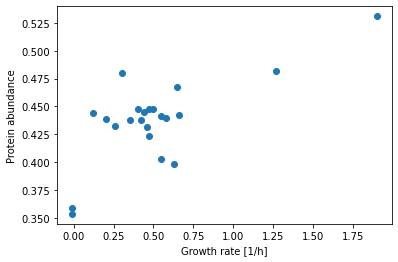

In [11]:
# Merge protein abundances
proteome_norm_sum_merge = proteome_norm_model_sum_df.copy()
proteome_norm_sum_merge['Protein abundance sum'] = proteome_norm_sum_merge['Protein abundance sum'] + proteome_norm_sum_j_df['Protein abundance sum']
proteome_norm_sum_merge_sort = proteome_norm_sum_merge.sort_values(by='Growth rates')
print(proteome_norm_sum_merge_sort)

# plot sum of protein abundances against growth rate as scatter plot
fig, ax = plt.subplots()
ax.scatter(proteome_norm_sum_merge['Growth rates'], proteome_norm_sum_merge['Protein abundance sum'])
ax.set_xlabel('Growth rate [1/h]')
ax.set_ylabel('Protein abundance')

In [12]:
# mean protein abundances for each condition
protein_abundance_mean = proteome_norm_sum_merge['Protein abundance sum'].mean()
print(f'Mean total protein abundance: {round(protein_abundance_mean*0.32, 4)} g/gDW')

Mean total protein abundance: 0.1401 g/gDW


## Unused Protein Sector

In [24]:
#linear relation growth rate and protein abundance
protein_vs_mu = linregress(x=proteome_norm_sum_merge['Growth rates'], y = proteome_norm_sum_merge['Protein abundance sum']*0.32)

Text(0, 0.5, 'Protein abundance')

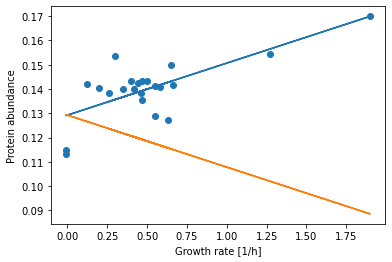

In [29]:
slope = protein_vs_mu.slope
intercept = protein_vs_mu.intercept

y= [intercept + slope*mu for mu in proteome_norm_sum_merge['Growth rates']]
#inverse relation is the fraction of unused proteins to fill up the protein space
y2 = [intercept - slope*mu for mu in proteome_norm_sum_merge['Growth rates']]

# plot sum of protein abundances against growth rate as scatter plot
fig, ax = plt.subplots()
ax.plot(proteome_norm_sum_merge['Growth rates'],y)
ax.plot(proteome_norm_sum_merge['Growth rates'],y2)
ax.scatter(proteome_norm_sum_merge['Growth rates'], proteome_norm_sum_merge['Protein abundance sum']*0.32)
ax.set_xlabel('Growth rate [1/h]')
ax.set_ylabel('Protein abundance')

In [32]:
print(f'Max total protein abundance: {round(proteome_norm_sum_merge["Protein abundance sum"]["LB"]*0.32, 5)} g/gDW')
print('Unused enzymes at zero growth: ', round(proteome_norm_sum_merge['Protein abundance sum']['LB']*0.32-intercept,4), ' g/gDW')
print('Change in unused enzymes with increasing growth rate: ', -round(slope,4), ' g/gDW/h')

Max total protein abundance: 0.16995 g/gDW
Unused enzymes at zero growth:  0.0407  g/gDW
Change in unused enzymes with increasing growth rate:  -0.0214  g/gDW/h
